In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Univariate Analysis

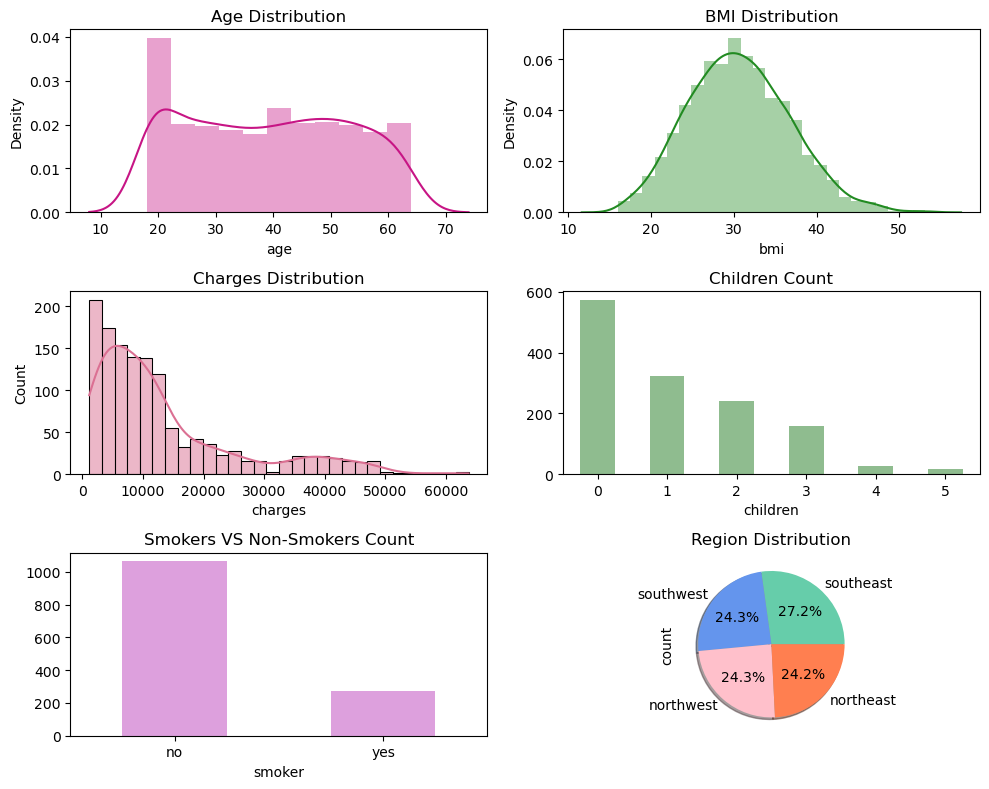

In [3]:
#age_dist = df['age'].value_counts()
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
sns.distplot(df['age'], color='mediumvioletred')
plt.title("Age Distribution")

plt.subplot(3,2,2)
sns.distplot(df['bmi'], color='forestgreen')
plt.title("BMI Distribution")


plt.subplot(3,2,3)
sns.histplot(df['charges'], kde=True, color='palevioletred')
plt.title("Charges Distribution")

plt.subplot(3,2,4)
bar1 = df['children'].value_counts()
bar1.plot.bar(color='darkseagreen')
plt.title("Children Count")
plt.xticks(rotation=0)

plt.subplot(3,2,5)
bar2 = df['smoker'].value_counts()
bar2.plot.bar(color='plum')
plt.title("Smokers VS Non-Smokers Count")
plt.xticks(rotation=0)

plt.subplot(3,2,6)
colorss = ['mediumaquamarine', 'cornflowerblue', 'pink', 'coral']
pies = df['region'].value_counts(dropna=False)
pies.plot.pie(autopct='%1.1f%%', shadow=True, colors=colorss)
plt.title("Region Distribution")

plt.tight_layout()
plt.show()

# Bivariate Analysis

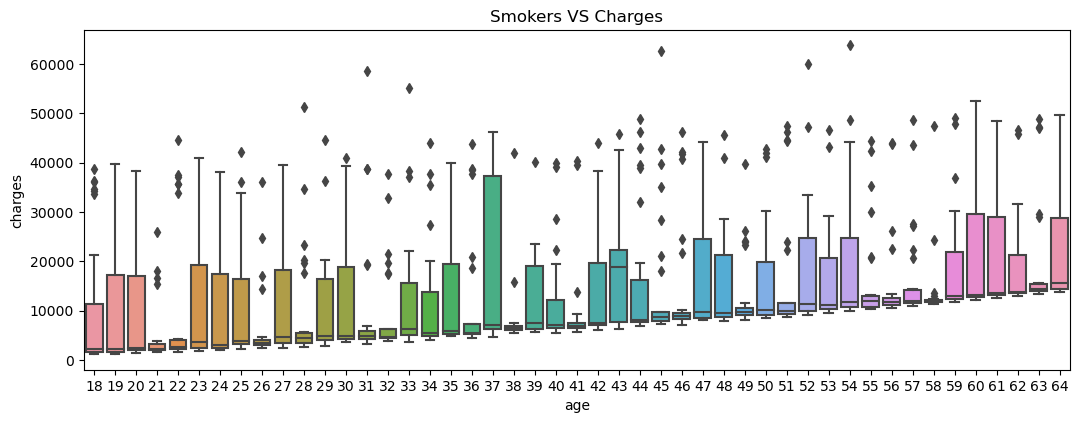

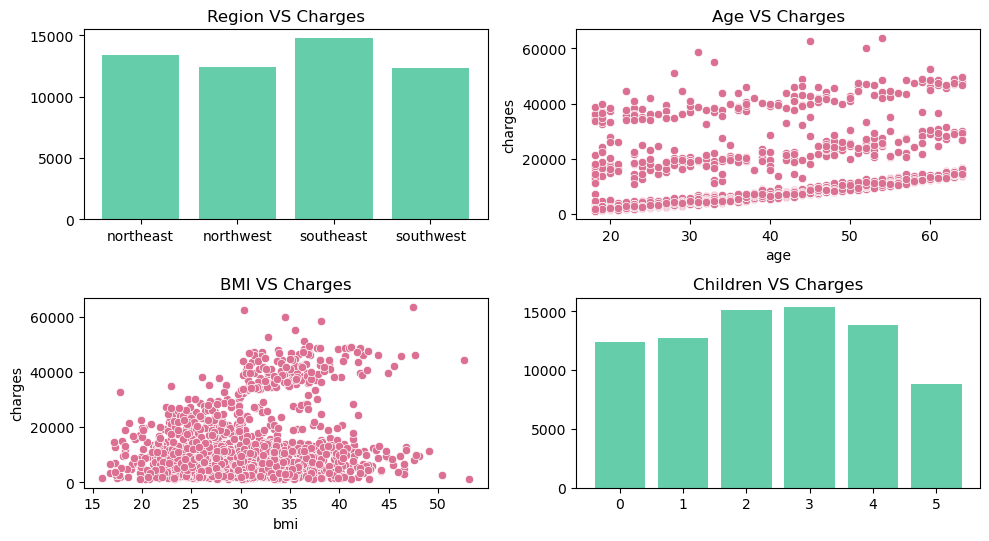

In [4]:
plt.figure(figsize=(28,15))
plt.subplot(3,2,1)
sns.boxplot(x=df['age'], y=df['charges'])
plt.title("Smokers VS Charges")

plt.figure(figsize=(10,8))
plt.subplot(3,2,3)
reg_chrg = df.groupby('region')['charges'].mean().reset_index()
plt.bar(x=reg_chrg['region'], height=reg_chrg['charges'], color='mediumaquamarine')
plt.title("Region VS Charges")


plt.subplot(3,2,4)
sns.scatterplot(x=df['age'], y=df['charges'], color='palevioletred')
plt.title("Age VS Charges")

plt.subplot(3,2,5)
sns.scatterplot(x=df['bmi'], y=df['charges'], color='palevioletred')
plt.plot()
plt.title("BMI VS Charges")

plt.subplot(3,2,6)
child_chrg = df.groupby('children')['charges'].mean().reset_index()
plt.bar(x=child_chrg['children'], height=child_chrg['charges'], color='mediumaquamarine')
plt.title("Children VS Charges")

plt.tight_layout()
plt.show()

# Multi-Variate Analysis

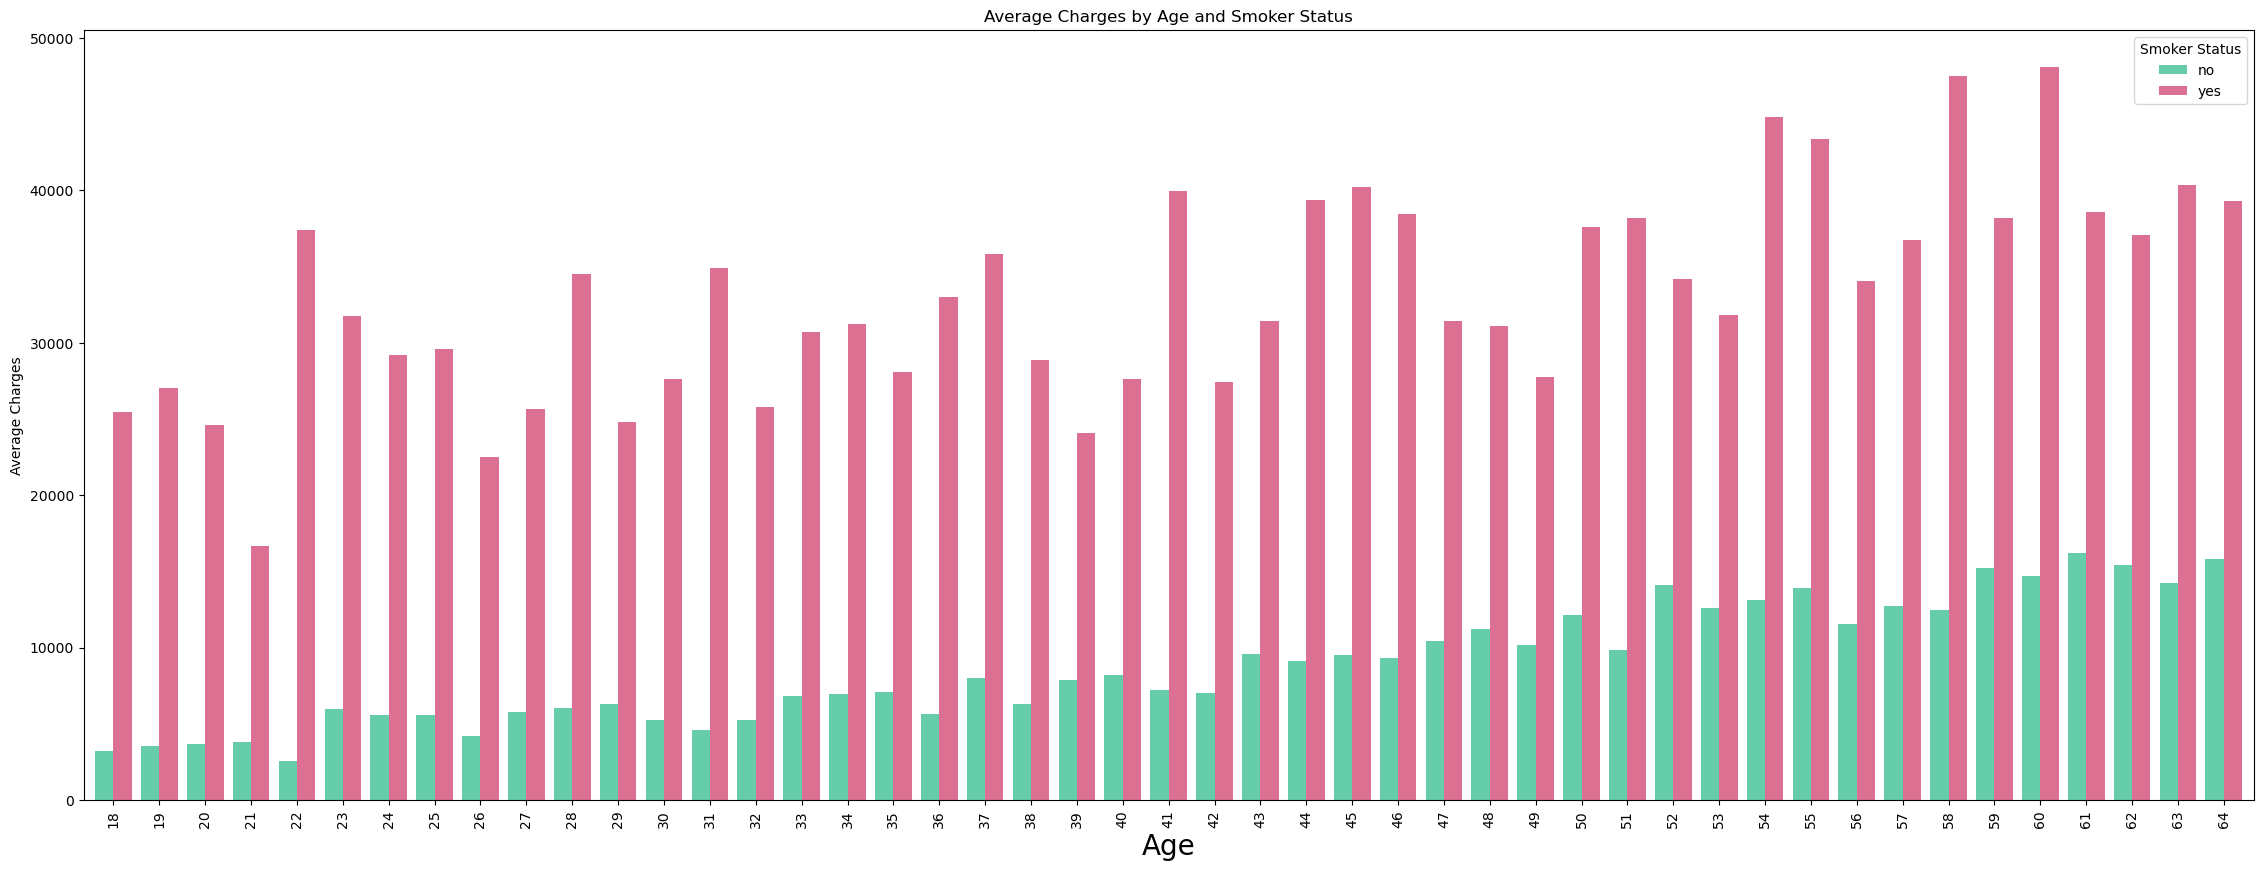

In [5]:
fig, ax = plt.subplots(figsize=(28, 10))
age_smoker_charges = df.groupby(['age', 'smoker'])['charges'].mean().unstack()
age_smoker_charges.plot(kind='bar',width=0.8, color=['mediumaquamarine', 'palevioletred'], ax=ax)
ax.set_xlabel("Age", fontsize=20)
ax.set_ylabel("Average Charges")
ax.set_title("Average Charges by Age and Smoker Status")
ax.legend(title="Smoker Status")
plt.show()

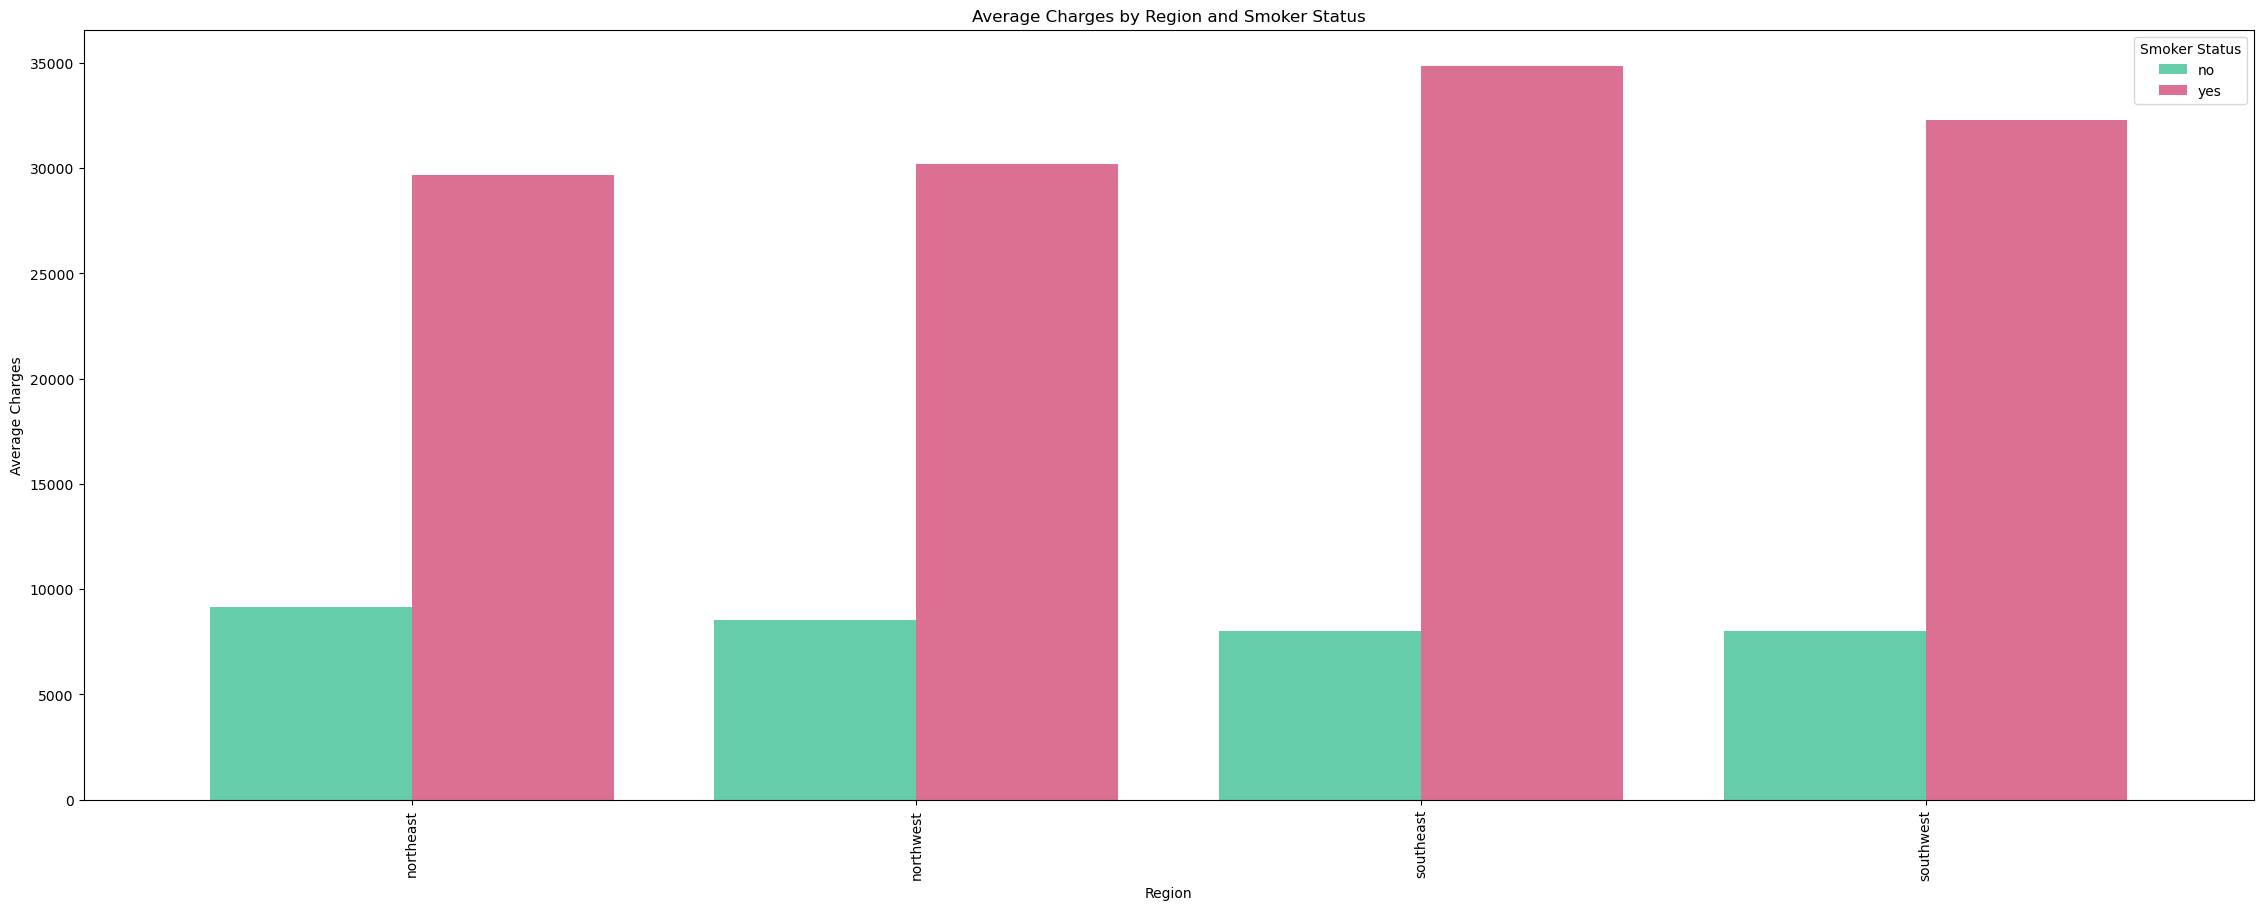

In [6]:
fig, ax = plt.subplots(figsize=(28, 10))
region_smoker_charges = df.groupby(['region', 'smoker'])['charges'].mean().unstack()
region_smoker_charges.plot(kind='bar', width=0.8, color=['mediumaquamarine', 'palevioletred'], ax=ax)
ax.set_xlabel("Region")
ax.set_ylabel("Average Charges")
ax.set_title("Average Charges by Region and Smoker Status")
ax.legend(title="Smoker Status")
plt.show()

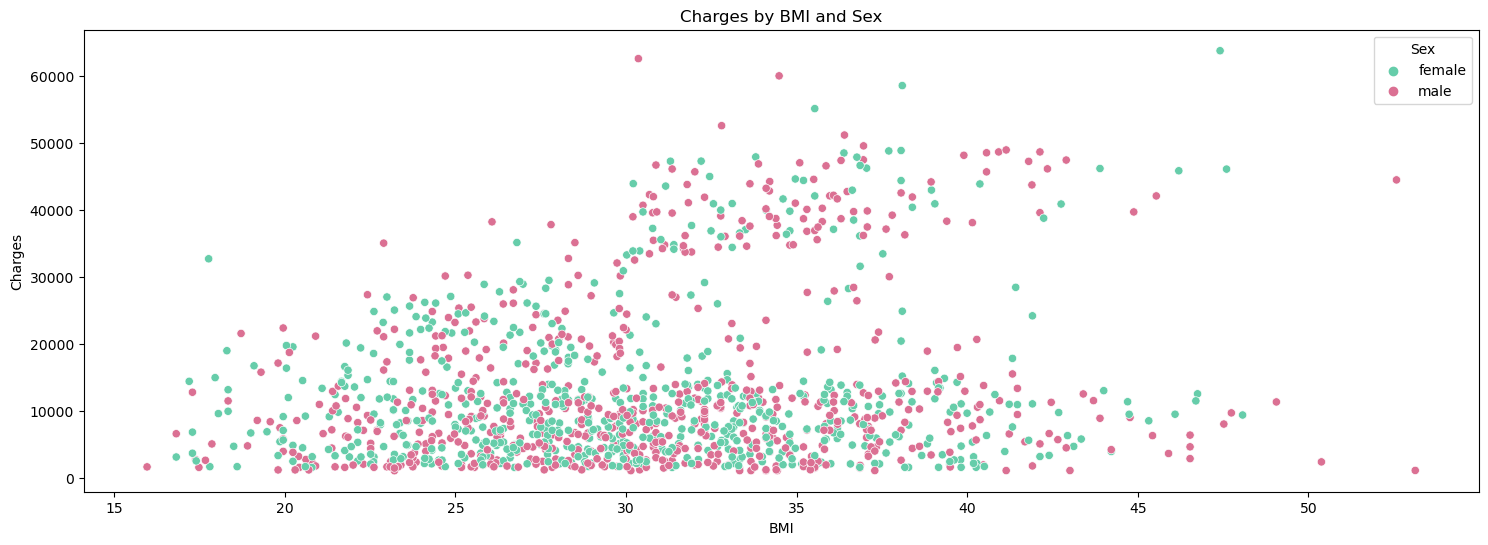

In [7]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex', palette=['mediumaquamarine', 'palevioletred'])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Charges by BMI and Sex")
plt.legend(title="Sex")
plt.show()

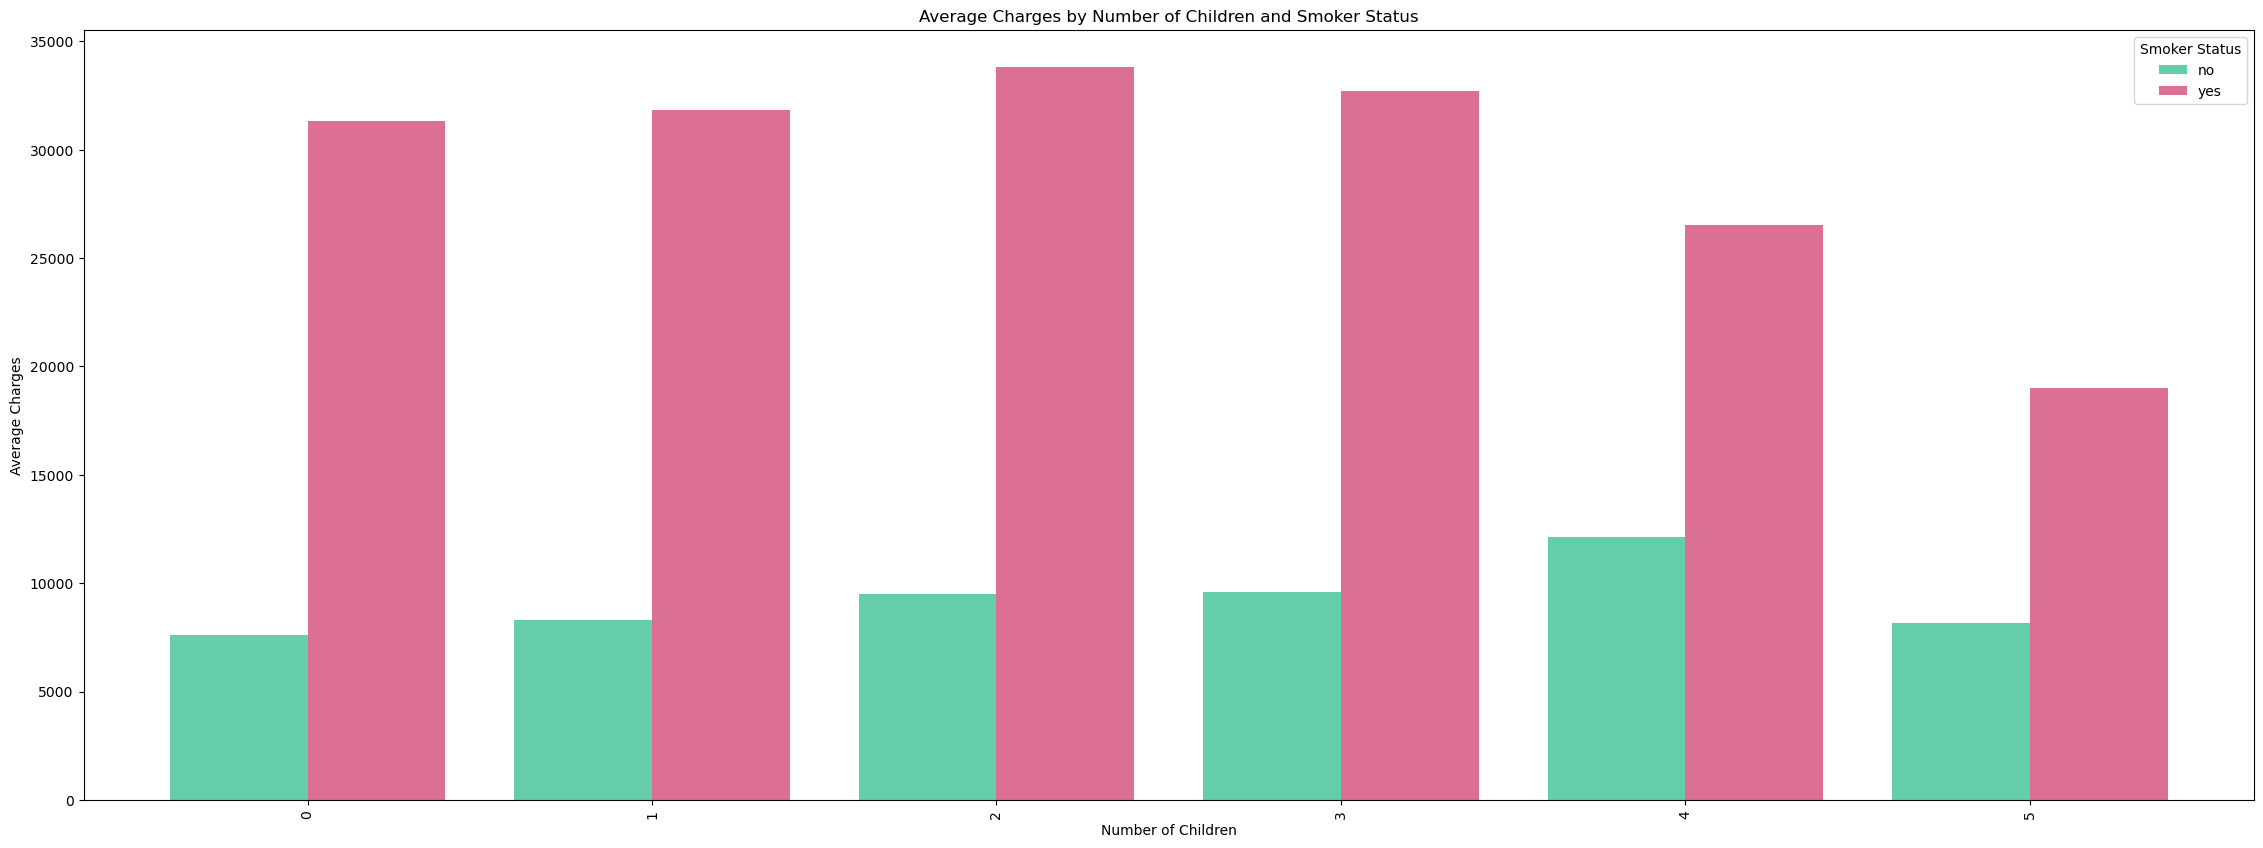

In [8]:
fig, ax = plt.subplots(figsize=(28, 10))
children_smoker_charges = df.groupby(['children', 'smoker'])['charges'].mean().unstack()
children_smoker_charges.plot(kind='bar', width=0.8, color=['mediumaquamarine', 'palevioletred'], ax=ax)
ax.set_xlabel("Number of Children")
ax.set_ylabel("Average Charges")
ax.set_title("Average Charges by Number of Children and Smoker Status")
ax.legend(title="Smoker Status")
plt.show()

### **1. Distributions**
- **Charges**: 
  - High variability in charges can indicate the presence of outliers. Extremely high charges are likely associated with smokers or individuals with many children.

---

### **2. Relationships**
- **Smoker vs. Charges**:
  - Smokers are expected to have significantly higher charges. The difference in box plots for smokers and non-smokers would validate this assumption.
  - This suggests `smoker` is a strong predictor variable.

- **Region vs. Charges**:
  - Differences in average charges by region can indicate that location impacts healthcare costs. However no tremendous changes can be seen with respect to region

- **Age vs. Charges**:
  - A scatter plot shows a positive trend, indicating that charges increase with age, especially for older individuals.


- **Children vs. Charges**:
  - A higher number of children could lead to increased charges. Use bar plots to verify if this relationship holds.

---

### **3. Multivariate Analysis**
- **Smoker and Region Impact**:
  - If smokers in a specific region have higher charges than others, it suggests an interaction effect between smoker status and region.
  
- **Age, BMI, and Charges**:
  - A combined analysis reveals how age and BMI together influence charges. For instance, older individuals with high BMI shows disproportionately higher charges.

---

# Outlier Detection

In [9]:
q1 = df['charges'].quantile(0.25)  # First quartile (25th percentile)
q3 = df['charges'].quantile(0.75)  # Third quartile (75th percentile)
iqr = q3 - q1  # Interquartile range

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outlier_in_charges = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
outlier_in_charges

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


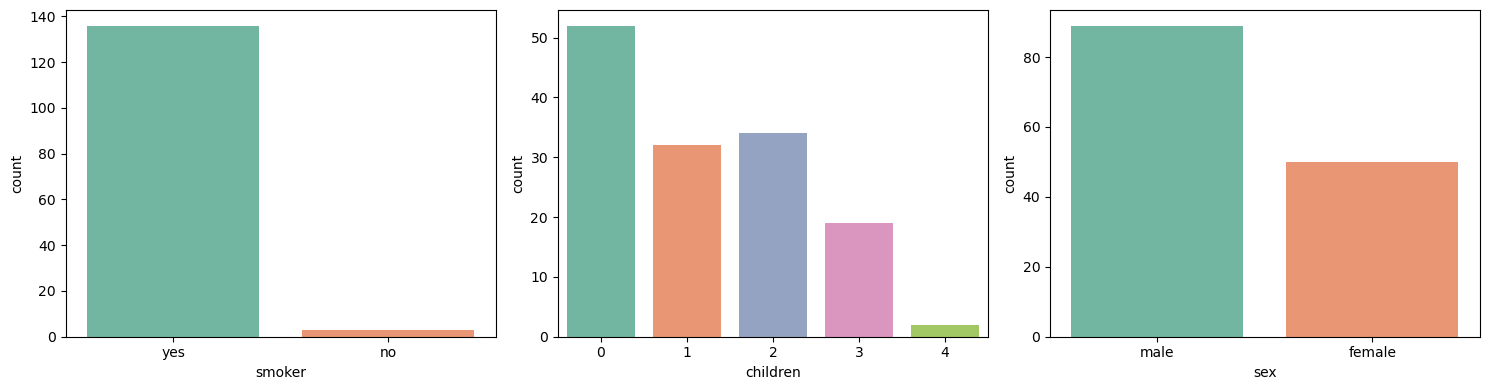

In [10]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.countplot(x='smoker', data=outlier_in_charges, palette = "Set2")

plt.subplot(1,3,2)
sns.countplot(x='children', data=outlier_in_charges, palette = "Set2")

plt.subplot(1,3,3)
sns.countplot(x='sex', data=outlier_in_charges, palette = "Set2")

plt.tight_layout()
plt.show()

- **Smoker vs. Charges**:
    - Higher count of Smokers indicate that smoking individual healthcare cost is extremely high
- **Children vs. Charges**: 
    - Individual with no children tends to have higher charges and vice versa. Thus the relation is indirectly proportional for Outlier charges dataframe
- **Sex vs. Charges**:
    - As the graph indicates, Charges based on gender impacts. Male healthcare cost is more than females.
    
***Lets find out how much difference if present***
  
    

In [11]:
smoker_avg = df.groupby('smoker')['charges'].mean()
# Percentage difference between smokers and non-smokers
smoker_diff = ((smoker_avg['yes'] - smoker_avg['no']) / smoker_avg['no']) * 100
print(f"Smokers pay {smoker_diff:.2f}% more than non-smokers on average.")

sex_avg = df.groupby('sex')['charges'].mean()
# Percentage difference between females and males
sex_diff = ((sex_avg['male'] - sex_avg['female']) / sex_avg['female']) * 100
print(f"Males pay {sex_diff:.2f}% more than females on average.")

Smokers pay 280.00% more than non-smokers on average.
Males pay 11.04% more than females on average.


In [12]:
df1 = df.copy()
df1['smoker'] = df1['smoker'].map({'yes': 1, 'no': 0})
df1['sex'] = df1['sex'].map({'male': 1, 'female': 0})

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['region'] = le.fit_transform(df['region'])

X = df1.drop(columns=['charges'])
y= df1['charges']

# Check for Multicollinearity using VIF

### Interpretation of the VIF (Variance Inflation Factor)

**VIF** is a measure used to detect multicollinearity in regression models. A high VIF indicates that a variable is highly correlated with others, which can cause issues in the model.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
X = sm.add_constant(X)

In [14]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns

In [15]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,const,33.241509
1,age,1.015394
2,sex,1.008889
3,bmi,1.040608
4,children,1.002482
5,smoker,1.006466
6,region,1.025966


### **VIF Thresholds**
- **VIF < 5**: No significant multicollinearity. Variables are good to include in the model.
- **VIF between 5 and 10**: Moderate multicollinearity; investigate further.
- **VIF > 10**: High multicollinearity; the variable may need to be removed or adjusted.

---

### **Conclusion**
- All independent variables have **low VIF (< 5)**, indicating no multicollinearity concerns.  
- The **constant** (intercept) has a high VIF, but that’s expected and doesn't require action.

# One-hot Encoding

In [16]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

df = pd.get_dummies(df, columns=['sex', 'region', 'smoker', 'children'], dtype='int')

In [17]:
df

,age,bmi,charges,sex_0,sex_1,region_northeast,region_northwest,region_southeast,region_southwest,smoker_0,smoker_1,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.92400,1,0,0,0,0,1,0,1,1,0,0,0,0,0
1,18,33.770,1725.55230,0,1,0,0,1,0,1,0,0,1,0,0,0,0
2,28,33.000,4449.46200,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,33,22.705,21984.47061,0,1,0,1,0,0,1,0,1,0,0,0,0,0
4,32,28.880,3866.85520,0,1,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1334,18,31.920,2205.98080,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1335,18,36.850,1629.83350,1,0,0,0,1,0,1,0,1,0,0,0,0,0
1336,21,25.800,2007.94500,1,0,0,0,0,1,1,0,1,0,0,0,0,0


# Log Transformation of Target Variable

In [18]:
df["charges"] = np.log1p(df["charges"])

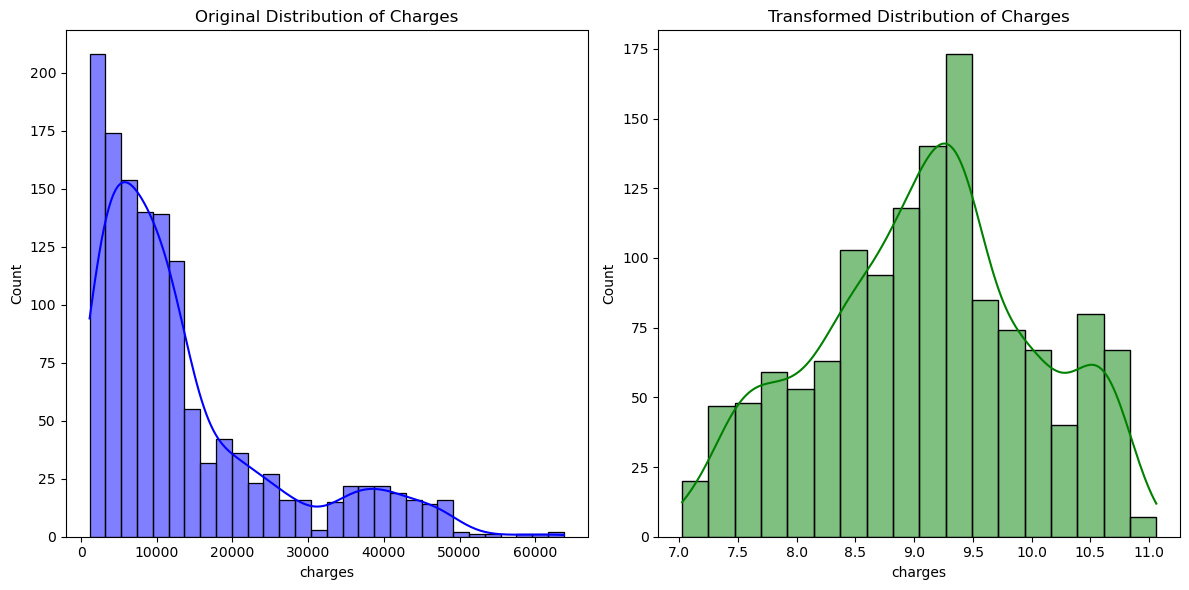

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1["charges"], kde=True, color='blue')
plt.title('Original Distribution of Charges')

plt.subplot(1, 2, 2)
sns.histplot(df["charges"], kde=True, color='green')
plt.title('Transformed Distribution of Charges')

plt.tight_layout()
plt.show()

In [20]:
X = df.drop('charges', axis=1)
y = df['charges']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [22]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("y_train shape {}, len {}.".format(y_train.shape,len(y_train)))
print("y_test shape {}, len {}.".format(y_test.shape,len(y_test)))

X_train shape (1070, 16), len 1070.
X_test shape (268, 16), len 268.
y_train shape (1070,), len 1070.
y_test shape (268,), len 268.


# Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Dictionary to Store train and test R² scores

In [24]:
train_scores = {}
test_scores = {}

# Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Train and test predictions
y_train_pred_log = lr.predict(X_train_scaled)
y_test_pred_log = lr.predict(X_test_scaled)

# Transform predictions back to original scale
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)

# Calculate R² scores
train_scores['Baseline LR'] = r2_score(y_train_original, y_train_pred)
test_scores['Baseline LR'] = r2_score(y_test_original, y_test_pred)

print(train_scores['Baseline LR'])
print(test_scores['Baseline LR'])

0.5372055673894032
0.47787789154311255


# Polynomial Features

In [26]:
from sklearn.preprocessing import PolynomialFeatures
# Step 2: Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Train and test predictions
y_train_pred_poly_log = lr_poly.predict(X_train_poly)
y_test_pred_poly_log = lr_poly.predict(X_test_poly)

# Transform predictions back to original scale
y_train_pred_poly = np.expm1(y_train_pred_poly_log)
y_test_pred_poly = np.expm1(y_test_pred_poly_log)

# Calculate R² scores
train_scores['Polynomial LR'] = r2_score(y_train_original, y_train_pred_poly)
test_scores['Polynomial LR'] = r2_score(y_test_original, y_test_pred_poly)

print(train_scores['Polynomial LR'])
print(test_scores['Polynomial LR'])

0.820374256232819
0.8601553437125529


# Ridge

In [27]:
from sklearn.linear_model import Ridge
# Step 3: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

# Train and test predictions
y_train_pred_ridge_log = ridge.predict(X_train_poly)
y_test_pred_ridge_log = ridge.predict(X_test_poly)

# Transform predictions back to original scale
y_train_pred_ridge = np.expm1(y_train_pred_ridge_log)
y_test_pred_ridge = np.expm1(y_test_pred_ridge_log)

# Calculate R² scores
train_scores['Ridge'] = r2_score(y_train_original, y_train_pred_ridge)
test_scores['Ridge'] = r2_score(y_test_original, y_test_pred_ridge)

print(train_scores['Ridge'])
print(test_scores['Ridge'])

0.8203816400912992
0.8683839640266149


# Lasso

In [28]:
from sklearn.linear_model import Lasso
# Step 4: Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly, y_train)

# Train and test predictions
y_train_pred_lasso_log = lasso.predict(X_train_poly)
y_test_pred_lasso_log = lasso.predict(X_test_poly)

# Transform predictions back to original scale
y_train_pred_lasso = np.expm1(y_train_pred_lasso_log)
y_test_pred_lasso = np.expm1(y_test_pred_lasso_log)

# Calculate R² scores
train_scores['Lasso'] = r2_score(y_train_original, y_train_pred_lasso)
test_scores['Lasso'] = r2_score(y_test_original, y_test_pred_lasso)

print(train_scores['Lasso'])
print(test_scores['Lasso'])

0.8219900417013952
0.8771849544274116


# Visualization of Train and Test Scores

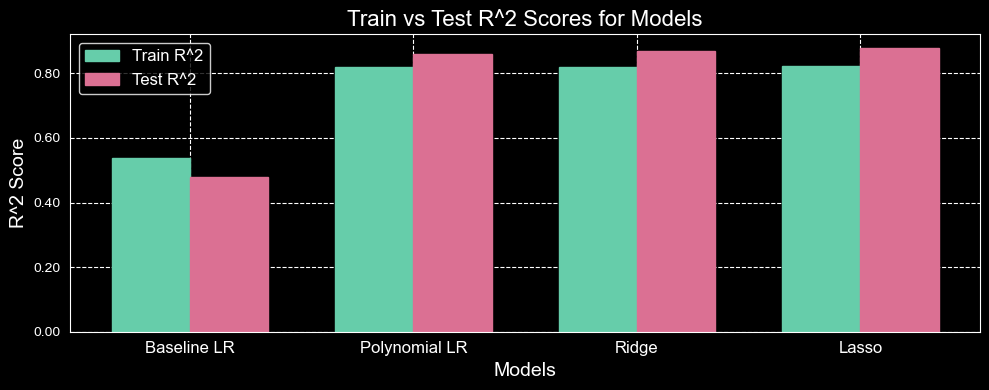

In [32]:
# Plot Train and Test R² Scores
models = train_scores.keys()
train_values = train_scores.values()
test_values = test_scores.values()

fig, ax = plt.subplots(figsize=(10, 4))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

bar_width = 0.35
x = range(len(models))

ax.bar(x, train_values, width=bar_width, label='Train R^2', color='mediumaquamarine', edgecolor='mediumaquamarine')
ax.bar([i + bar_width for i in x], test_values, width=bar_width, label='Test R^2', color='palevioletred', edgecolor='palevioletred')

ax.set_xlabel('Models', fontsize=14, color='white')  
ax.set_ylabel('R^2 Score', fontsize=14, color='white')
ax.set_title('Train vs Test R^2 Scores for Models', fontsize=16, color='white')

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(models, fontsize=12, color='white')
ax.set_yticklabels([f'{y:.2f}' for y in ax.get_yticks()], color='white') 
ax.legend(fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')

ax.grid(True, color='white', linestyle='--')

plt.tight_layout()
plt.show()